In [1]:
import numpy as np   #importing the libraries
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from os import listdir
from os import path
from scipy.interpolate import interp1d
from scipy.optimize import leastsq
from scipy.optimize import curve_fit

# Astronomy Lab 4- Extra-Solar Planets

### 2309624R

#### Aim

The aim of this experiment is to investigate two methods of extra-solar planet detection: the 'Doppler Wobble' and the transit method. These methods will examine the radial velocity and analyse stellar photometry, respectively. This experiment should also develop confidence in python programming and computer analysis of experimental data. 

#### Method

#### Part 1

##### Part 1.1 Dopler Shifted Spectra



This part of the experiment involved taking the data and analysing it to plot the intensity against wavelength. Then the radial velocity's effect on spcetral intensity was examined and a number of lines were plotted under the effect of different radial velocity shifts. The magnitude of the radial velocity shift needed before a noticable difference between the shifted and original spectras was also found and recorded.

In [2]:
data = np.loadtxt('G8V_template.txt', usecols = (0, 1))   #beginning of the section 1.1
wavelength = data[:,0]   #importing and assigning the neccesary data
intensity = data[:, 1]

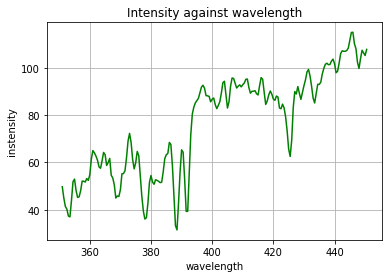

In [3]:
pltwav = wavelength[0:200]
pltints = intensity[0:200]
plt.plot(pltwav, pltints, c = 'g')
plt.xlabel('wavelength')
plt.ylabel('instensity')
plt.title('Intensity against wavelength')
plt.grid()
plt.show() #plotting the data in the given wavelength range

In [4]:
def costFunction(v, wavelengths, intensities, template): #defining the costfunction that we're going to use later with the minimize function
    return np.sum((template - shift_spectrum(wavelengths, intensities, v))**2)

In [5]:
def shift_spectrum(wavelengths, intensities, v):#defining the shiftspectrum that we're going to use to plot the doppler shifted spectrum
    c = 299792458
    shiftedWvl = wavelengths * (1.0 + v/c)
    shiftedIntens = intensities / (1.0 + v/c)
    interpolatedShift = interp1d(shiftedWvl, shiftedIntens, bounds_error = False, fill_value = (intensities[0], intensities[-1]))(wavelengths)
    return interpolatedShift

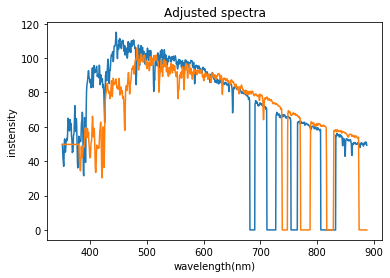

In [6]:
v = 25000000
len(wavelength)
shift = shift_spectrum(wavelength, intensity, v)

plt.plot(wavelength, intensity) #plotting the original data for comparision
plt.title('Original spectra')
plt.xlabel('wavelength(nm)')
plt.ylabel('instensity')
plt.grid()

plt.plot(wavelength, shift) #plotting the shifted data
plt.grid()
plt.xlabel('wavelength(nm)')
plt.ylabel('instensity')
plt.title('Adjusted spectra')
plt.show()

#part 1.1 finished

A radial velocity of approximately 200-400kms$^{-1}$ is required to see the difference between the spectras clearly.

##### Part 1.2 Best Fit Velocity Shifts

Here, the minimise function of python was used to find the radial velocity shift required to make the sum of the the difference between the shifted spectra and the template spectra equal to 0. This was applied to all 30 data files and plotted then repeated for the other star.

In [7]:
mypath = './HD-28185'

from os import listdir
from os.path import isfile, join #importing the files from the given path in an ordered list (min to max)
onlyfiles = [f for f in sorted(listdir(mypath)) if isfile(join(mypath, f))] 

for i,f in enumerate(onlyfiles):  #a filter that returns only the .txt files from the 'onlyfiles' variables
    if not f[-4:] == '.txt':
        del onlyfiles[i]



i = 0
#print (len(onlyfiles))
datapoints1 = []
while i < (len(onlyfiles)): #using the minimize function for every data file in the directory
    data = np.genfromtxt(onlyfiles[i], usecols = (0, 1, 2), invalid_raise = False)
#     print(onlyfiles[i])
    wavelengths = data[:,0]
    templateSpectrum = data[:,1]
    intensities = data[:,2]
    least = minimize(costFunction, 30000, args=(wavelengths, intensities, templateSpectrum), method = 'Nelder-Mead')
    datapoints1.append(least.x)#storing all the calculated velocity shifts in a variable for the next part
    i = i + 1
#print(datapoints)
print(least)

 final_simplex: (array([[-3986.70512438],
       [-3986.70521379]]), array([132.00648002, 132.00648002]))
           fun: 132.0064800191709
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 33
        status: 0
       success: True
             x: array([-3986.70512438])


##### 1.3 Radial Velocity Curve

Radial velocity was plotted against Julian date during this part of the exeriment. It showed no structure and so the radial velocity was plotted against phase instead. To do this, the phase was calculated for all the data then plotted for the two stars seperately.

Plotting Unfitted Radial Shift Against Phase:

51475


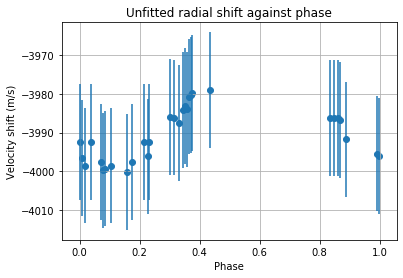

In [10]:
numbers1 = []
i = 0
while i < (len(onlyfiles)):  #converting the strings into integers
    numbers1.append(float(onlyfiles[i][2:-4]))
    i = i + 1

print(onlyfiles[1][2:-4])

numbers1 = np.array(numbers1)
phases1 = ((numbers1-numbers1[0])/383)%1


plt.scatter(phases1,datapoints1) #plotting the calculated velocity shifts against phases 
plt.errorbar(phases1, datapoints1, yerr=15, fmt='none', colour='r')
plt.grid()
plt.title('Unfitted radial shift against phase')
plt.xlabel('Phase')
plt.ylabel('Velocity shift (m/s)')
plt.show()

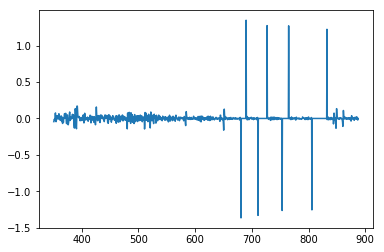

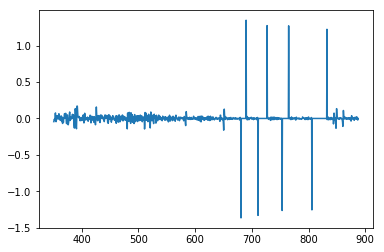

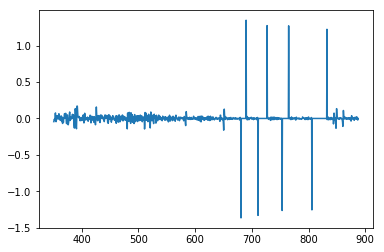

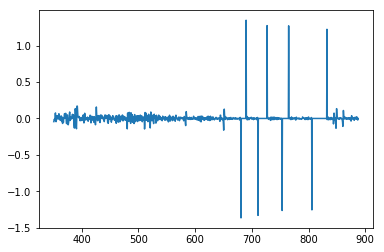

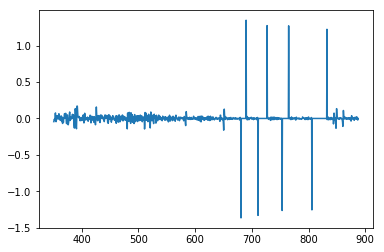

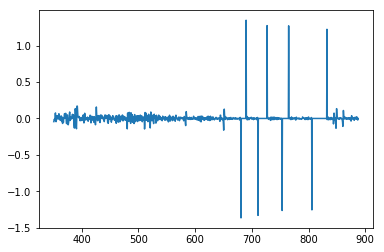

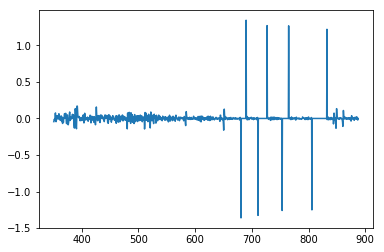

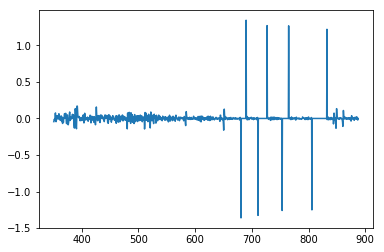

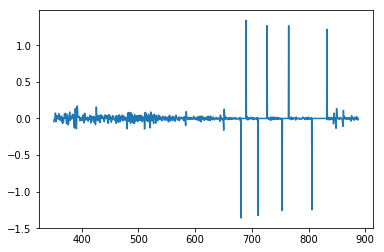

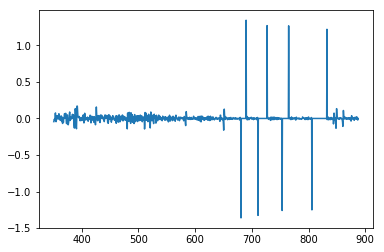

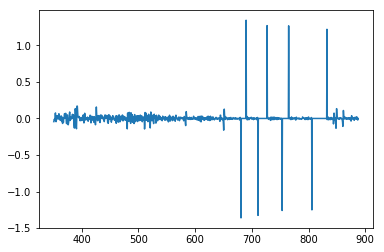

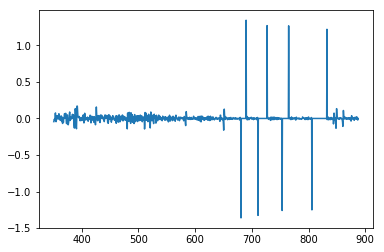

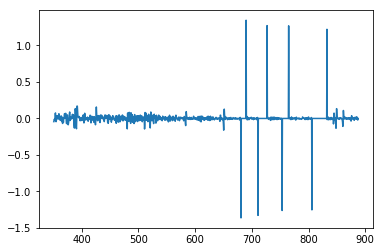

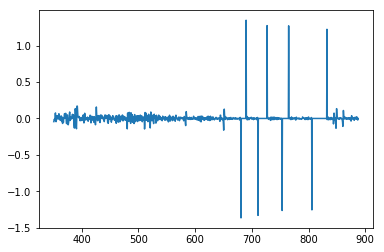

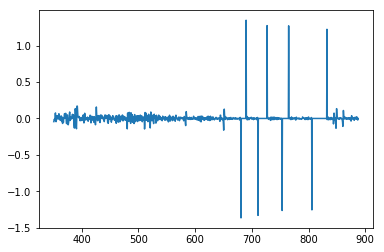

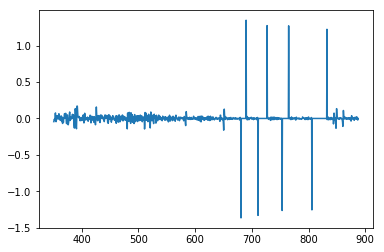

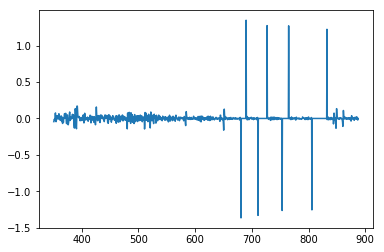

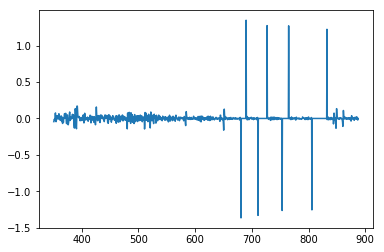

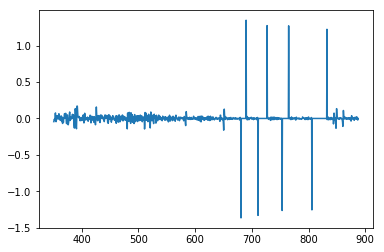

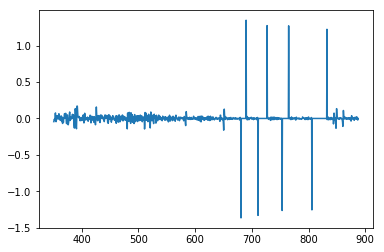

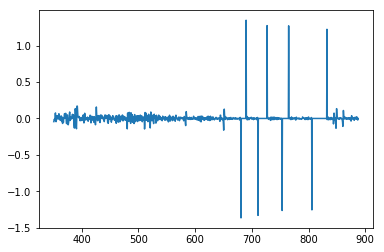

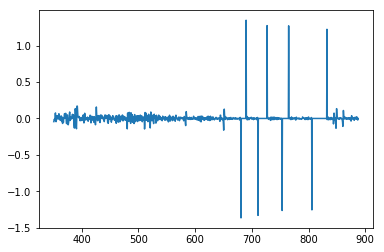

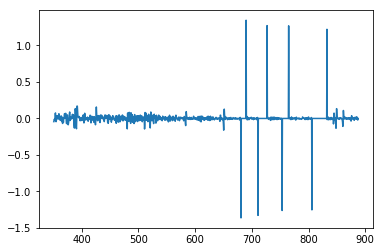

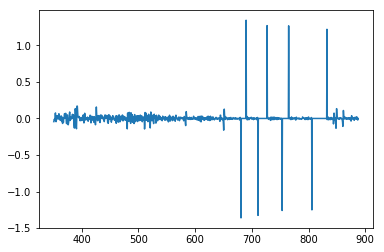

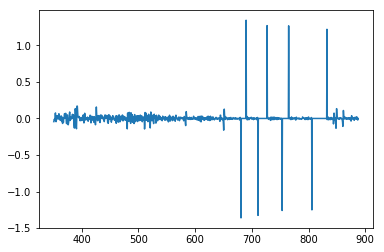

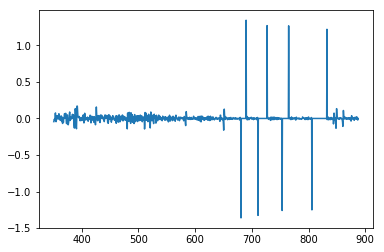

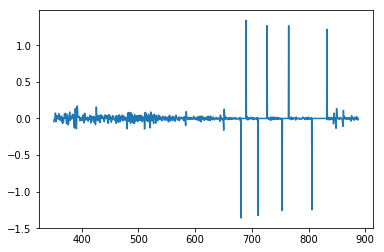

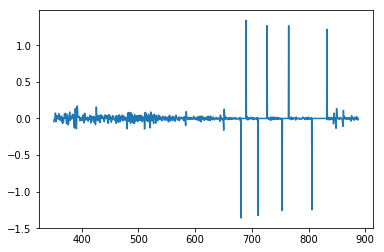

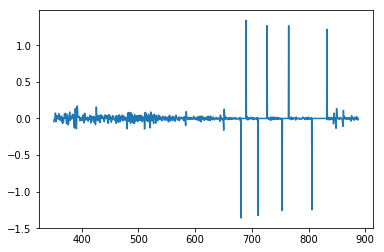

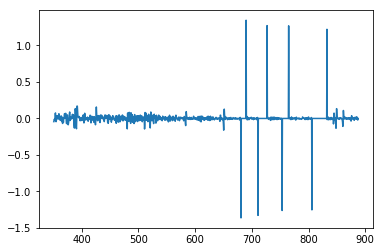

In [56]:
  #testing how well the minimize function worked by plugging the numbers in
i = 0
while i < (len(onlyfiles)):
   v = datapoints1[i]
   shift = shift_spectrum(wavelength, intensity, v)
   plt.plot(wavelength, shift-intensity)
   plt.show()
   i = i + 1

In [14]:
#repeating the above steps for the HD-73256 as well
mypath = './HD-73256'

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in sorted(listdir(mypath)) if isfile(join(mypath, f))]

for i,f in enumerate(onlyfiles):
    if not f[-4:] == '.txt':
        del onlyfiles[i]  
# print(onlyfiles)


numbers2 = []
i = 0
while i < (len(onlyfiles)):
    numbers2.append(float(onlyfiles[i][2:-4]))
    i = i + 1


numbers2 = np.array(numbers2)
phases2 = ((numbers2-numbers2[0])/2.54858)%1

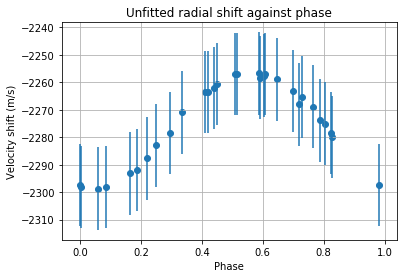

In [58]:
i = 0
datapoints2 = []
while i < (len(onlyfiles)):
    data = np.genfromtxt(onlyfiles[i], usecols = (0, 1, 2), invalid_raise = False)
#     print(onlyfiles[i])
    wavelengths = data[:,0]
    templateSpectrum = data[:,1]
    intensities = data[:,2]
    least = minimize(costFunction, -1000000, args=(wavelengths, intensities, templateSpectrum), method = 'Nelder-Mead')
    datapoints2.append(least.x)
    i = i + 1
#print(datapoints)


plt.scatter(phases2,datapoints2)
plt.errorbar(phases2, datapoints2, yerr=15, fmt='none', colour='r')
plt.grid()
plt.title('Unfitted radial shift against phase')
plt.xlabel('Phase')
plt.ylabel('Velocity shift (m/s)')
plt.show()

##### Part 1.4 Fitting a Radial Velocity Amplitude

In this section Python was used to obtain best fit estimates of the data.

Plotting Fitted Radial Velocity Shift Against Phase:

In [59]:
def velfit(phases1, vmean, vs, fimax): #defining the function that is about to be used with the leastsq function later
    return np.array(vmean + vs*np.sin(2*np.pi*phases1 + fimax))

[[  1.60102043e-03  -1.75507912e-03  -4.89808701e-05]
 [ -1.75507912e-03   3.79922421e-03   6.84678516e-05]
 [ -4.89808701e-05   6.84678516e-05   8.71433804e-06]]
[ -3.98484386e+03  -1.33416151e+01   1.03161007e+00]
0.00160102042719


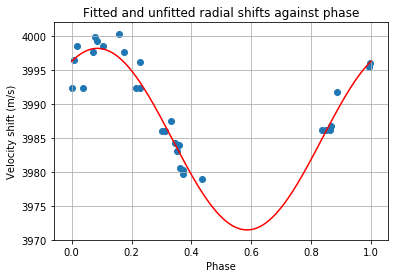

In [60]:
phases1 = np.asarray(phases1)
datapoints1 = np.asarray(datapoints1)
popt, pcov = curve_fit(velfit, phases1.ravel(), datapoints1.ravel(), p0=[-3390, 20, 0], sigma = 0.15, absolute_sigma = True)
print( pcov)
print(popt)
print(pcov[0, 0])

vmean = popt[0]
vs1 = popt[1]
fimax = popt[2]
phases = np.linspace(0, 1, 10000)
plt.errorbar(phases1, np.abs(datapoints1), yerr=np.sqrt(pcov[0, 0]), fmt='none', colour='r')
plt.scatter(phases1,  np.abs(datapoints1))
plt.plot(phases, np.abs((vmean + vs1*np.sin(2*np.pi*phases + fimax))), 'r')
plt.grid()
plt.title('Fitted and unfitted radial shifts against phase')
plt.xlabel('Phase')
plt.ylabel('Velocity shift (m/s)')
plt.show()

[[  7.82302699e-04  -2.10777332e-04   2.73192505e-06]
 [ -2.10777332e-04   1.54064898e-03   5.26849704e-06]
 [  2.73192505e-06   5.26849704e-06   3.45739170e-06]]
[-2276.97792896    21.12336828     4.35377989]


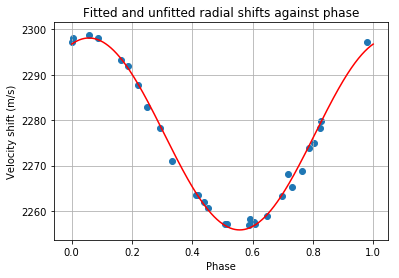

In [61]:
#doing the same for the shorter period star
phases2 = np.asarray(phases2)
datapoints2 = np.asarray(datapoints2)
popt, pcov = curve_fit(velfit, phases2.ravel(), datapoints2.ravel(), p0=[-2280, 20, 3*np.pi/2], sigma = 0.15, absolute_sigma = True)
print( pcov)
print(popt)


vmean = popt[0]
vs2 = popt[1]
fimax = popt[2]
phases = np.linspace(0, 1, 10000)
plt.errorbar(phases2, np.abs(datapoints2), yerr=np.sqrt(pcov[0, 0]), xerr=np.sqrt(pcov[2, 2]), fmt='none', colour='r')
plt.scatter(phases2,np.abs(datapoints2))
plt.plot(phases, np.abs((vmean + vs2*np.sin(2*np.pi*phases + fimax))), 'r')
plt.grid()
plt.title('Fitted and unfitted radial shifts against phase')
plt.xlabel('Phase')
plt.ylabel('Velocity shift (m/s)')
plt.show()

In [62]:
print(phases2)

[ 0.          0.60818181  0.64743504  0.18832448  0.43946041  0.0039316
  0.29428937  0.08633827  0.69844384  0.72981817  0.41984948  0.058872
  0.5924711   0.33351121  0.25112023  0.1647898   0.58857089  0.98094625
  0.51399603  0.71803906  0.21973805  0.60424236  0.41199413  0.51010367
  0.76511626  0.82398826  0.45124736  0.82789632  0.78865878  0.80436164]


##### Part 1.5 Finding the Planetary Mass and Semimajor Axis

The mass of the planetary companions to the two stars was found and the semimajor axis was calculated by using data calculated previously and the following equation: 

$$G(M_s + m_p) = (\frac{4 \pi^2 a^3}{T^2})$$

In [64]:
M_s=1.989e30
G= 6.673e-11
T_1=383*3600*24

T_2=2.54858*3600*24

m_p1=(-1)*(vs1*M_s**(2/3))*(T_1/(2*np.pi*G))**(1/3)
print('mass of planet orbiting HD-28185=',m_p1,'kg')

m_p2=(vs2*M_s**(2/3))*(T_2/(2*np.pi*G))**(1/3)
print('mass of planet orbiting HD-72356=',m_p2,'kg')

a_1=((G*(M_s+m_p1)*(T_1**2))/(4*(np.pi)**2))**(1/3)
a_2=((G*(M_s+m_p2)*(T_2**2))/(4*(np.pi)**2))**(1/3)

print('semi-major axis of planet orbiting HD-28185=',a_1,'m''=',(a_1/1.49611e11),'AU')
print('semi-major axis of planet orbiting HD-72356=',a_2,'m''=',(a_2/1.49611e11),'AU')

mass of planet orbiting HD-28185= 9.05111546173e+26 kg
mass of planet orbiting HD-72356= 2.69540088232e+26 kg
semi-major axis of planet orbiting HD-28185= 49580446672540.16 m= 331.39573074533394 AU
semi-major axis of planet orbiting HD-72356= 329885849447.0 m= 2.20495718528 AU


#### Part 2

##### Part 2.1 Obtaining a Phase-Folded Light Curve

To obtain the curve the same procedure as that of 1.3 was reused, converting Julian dates into phases. Below are two plots showing the dip where the planet transits the star.

In [65]:
data = np.loadtxt('OGLE_III_TR56.txt', usecols = (0, 1, 2))
jd = sorted(data[:,0])
ibandmag = data[:, 1]
magerr = data[:, 2]

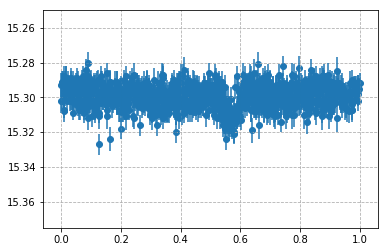

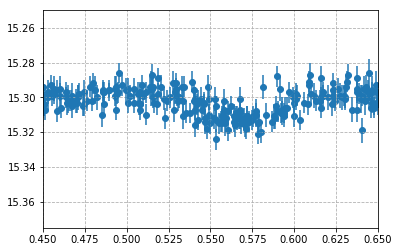

In [66]:
phases = np.zeros(len(jd))
i = 1
while i < len(jd):
    phases[i-1] = ((jd[i]-2452072)/1.2119)%1
    i = i + 1
plt.errorbar(phases, ibandmag, yerr=magerr, fmt='none', colour='red')
plt.scatter(phases, ibandmag)
plt.ylim([15.25,15.375])
plt.grid(linestyle = '--')
plt.ylim(plt.ylim()[::-1])
plt.show()

plt.errorbar(phases, ibandmag, yerr=magerr, fmt='none', colour='red')
plt.scatter(phases, ibandmag)
plt.ylim([15.25,15.375])
plt.xlim([0.45,0.65])
plt.ylim(plt.ylim()[::-1])
plt.grid(linestyle = '--')
plt.show()

The graph shows that the planet transits between phases 0.545 and 0.58, and hence the transit time for the planet is 0.025 of the phase. It also shows that the time taken for the planet to travel its own diameter is approximately 0.15 phases. It can also be seen that the dip in brightness of the stars magnitude is ~0.02±0.01.

##### Part 2.2 Estimating the Semimajor Axis and Radius of the Planet's Orbit

Using the measured orbital period and the following equation, the semimajor axis of the planet was calculated.

$$m_E - m_NE = -2.5 log_{10} (\frac{F_E}{F_{NE}}) = -2.5 log_{10} (1-\frac{R_p^2}{R_S^2})$$

In [70]:
print ('Values of mean I band apparent magnitude:')
i = 0
nonec = []
while i < len(phases):
    a = phases[i]
    b = ibandmag[i]
    if 0.5 < a  < 0.525:
        nonec.append(b)
    i = i + 1 
# print (nonec)
mnonec = np.mean(nonec)
print ('{0: .5}'.format(mnonec))

i = 0
ec = []
while i < len(phases):
    a = phases[i]
    b = ibandmag[i]
    if 0.55 < a  < 0.575:
        ec.append(b)
    i = i + 1 
mec = np.mean(ec)
print ('{0: .4}'.format(mec))
print ('{0: .3}'.format(mec-mnonec))

Values of mean I band apparent magnitude:
 15.299
 15.31
 0.0123


In [68]:
#calculating the semi-major axis of the planet
#not using the mass of the planet since when compared to the star it's negligible
G = 6.68*10**-11
ms = 1.989*10**30 #mass of the sun
period = 1.2119*24*3600 #converted to seconds
semmaj=(G*ms*period**2/(4*np.pi**2))**(1/3)
print ('Semi-major axis of the planet orbit =','{0: .3}'.format(semmaj), 'm')

#calculating the circumference of the planet's orbit
circ = 2*np.pi*semmaj
print('Circumference of the planets orbit is then','{0: .3}'.format(circ), 'm')

t = 0.035
radstar = t * circ
print ('The radius of the star is then', '{0: .3}'.format(radstar), 'm')

Semi-major axis of the planet orbit =  3.33e+09 m
Circumference of the planets orbit is then  2.09e+10 m
The radius of the star is then  7.32e+08 m


Comparison of the two values for the radius of the planet:

Transit:

In [69]:
#using the transit method to determine the planet's radius from the light curve
phaplan = 0.05
radplan = phaplan * circ / 2
print ('The radius of the planet is', '{0: .3}'.format(radplan), 'm, from the light curve')

The radius of the planet is  5.23e+08 m, from the light curve


Magnitude dip:

In [71]:
#using the magnitude dip to determine the planet's radius from the light curve
deltam = 0.0123

radplanet = ((1-((10**deltam)**-2.5))*radstar**2)**0.5
print ('{0: .3}'.format(radplanet), 'm')

 1.91e+08 m


The radii calculated for the planet, although very different values, are of the same order of magnitude meaning they can be considered to be relatively accurate. Possible sources of error could include another undetected planet in the system whose gravity disturbs the system, faulty detectors giving inaccurate readings or lacking the sensitivity required to obtain an accurate measurement and the possibility of some of the star's light not reaching the detectors due to interstellar gas clouds or obstructions in the Earth's atmosphere.

#### Conclusion

In conclusion, this experiment investigated two different methods of extra-solar planet detection. The transit method observed the radius of the planet to be 1.91x10$^8$m whereas the Doppler Wobble found the radius to be 5.23x10$^8$m. This experiment improved my confidence and knowledge of programming as well as bettering my data analysis skills and my knowledge of extra-solar planet detection.